## **Importing Required Libraries**

In [38]:
!pip install yahoo_fin

In [39]:
from yahoo_fin import stock_info

In [40]:
ford_data = stock_info.get_data("F")

In [41]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

## **Storing Ford's data into the DataFrame**

In [42]:
df = ford_data

In [43]:
df.tail(5)

,open,high,low,close,adjclose,volume,ticker
2024-04-25,12.85,13.18,12.630,13.04,13.04,86944100,F
2024-04-26,12.76,13.02,12.610,12.79,12.79,57257800,F
2024-04-29,12.81,12.84,12.550,12.75,12.75,50285600,F
2024-04-30,12.60,12.60,12.130,12.15,12.15,75890500,F
2024-05-01,12.16,12.43,12.155,12.20,12.20,44480505,F


Defining x and y

In [44]:
x = df.index
y = df['close']
y

1972-06-01     2.153220
1972-06-02     2.149165
1972-06-05     2.149165
1972-06-06     2.124835
1972-06-07     2.112670
                ...    
2024-04-25    13.040000
2024-04-26    12.790000
2024-04-29    12.750000
2024-04-30    12.150000
2024-05-01    12.200000
Name: close, Length: 13091, dtype: float64

## **Exploring Data**

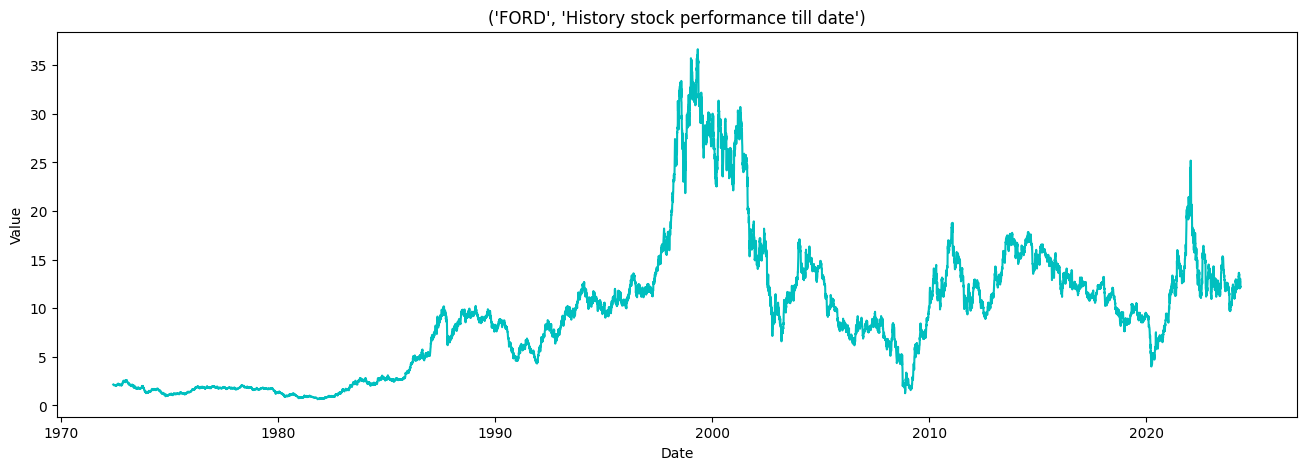

In [45]:
def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value'):
    plt.figure(figsize=(16,5))
    plt.plot(x, y, color='c')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

stock_name= "FORD"
title = (stock_name,"History stock performance till date")
df_plot(df , x , y , title=title,xlabel='Date', ylabel='Value')

In [46]:
print(df.columns)

Index(['open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker'], dtype='object')


In [47]:
df.describe()

,open,high,low,close,adjclose,volume
count,13091.000000,13091.000000,13091.000000,13091.000000,13091.000000,1.309100e+04
mean,9.497116,9.619391,9.365331,9.491193,4.951346,2.355082e+07
std,6.985904,7.086147,6.886408,6.983227,4.186192,3.164062e+07
min,0.000000,0.648804,0.638667,0.643736,0.120460,2.990110e+05
25%,2.691525,2.714334,2.653509,2.690763,0.625671,4.499282e+06
50%,9.169432,9.280000,9.078194,9.169432,4.265480,9.471480e+06
75%,12.720000,12.855000,12.530000,12.705000,8.043891,3.394115e+07
max,36.819485,37.300335,35.720394,36.647751,21.496586,5.411756e+08


In [48]:
x = df[['open', 'high','low', 'volume']]
y = df['close']

## **Split data into "training" and "test" datasets, with a test size of 15% of total dataset**

## **Linear Regression**

Linear Regression model for stock prediction

In [49]:
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 0, test_size=0.15,shuffle=False)

In [50]:
print(train_x.shape )
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(11127, 4)
(1964, 4)
(11127,)
(1964,)


## **Compute the Coefficeient of Determination**

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
regressor = LinearRegression()

In [53]:
regressor.fit(train_x, train_y)

LinearRegression()

In [54]:
regressor_confidence = regressor.score(test_x, test_y)
print("linear regression confidence: ", regressor_confidence)

linear regression confidence:  0.9988137836426197


I got 99% hence the model is a linear model that explains the variation of all Y values

List the predicted list of data points from the columns Open, High, Low, & Volume

In [55]:
y_predicted= regressor.predict(test_x)
print(test_x.head())

             open   high    low    volume
2016-07-13  13.49  13.51  13.31  26779800
2016-07-14  13.57  13.70  13.55  31803000
2016-07-15  13.63  13.67  13.53  19546300
2016-07-18  13.56  13.68  13.42  22545800
2016-07-19  13.56  13.72  13.50  26183400


## **Prediction Table of Actual Prices vs. Predicted Prices**

In [56]:
dfr=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':y_predicted})
dfr.head()

,Actual_Price,Predicted_Price
2016-07-13,13.48,13.367930
2016-07-14,13.59,13.645413
2016-07-15,13.57,13.579028
2016-07-18,13.65,13.541510
2016-07-19,13.65,13.629073


In [57]:
dfr.describe()

,Actual_Price,Predicted_Price
count,1964.000000,1964.000000
mean,11.504852,11.506885
std,3.004353,3.000497
min,4.010000,4.252734
25%,9.450000,9.440764
50%,11.645000,11.656123
75%,12.692500,12.685878
max,25.190001,25.372013


Woah pretty accurate!!!

## **Calculate the Error between the Actual and Predicted Price data-** to see how accurate the predictions are compared to the actural value

MAE- Mean Absolute Error, measures the average magnitude of the errors in a set of predictions

In [58]:
from sklearn import metrics

In [59]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, y_predicted))

Mean Absolute Error (MAE): 0.07080572753116841


RMSE- Root Mean Squared Error, is a quadratic scoring rule that measures the average magnitude of the error

In [60]:
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, y_predicted)))

Root Mean Squared Error (RMSE): 0.10344804350094963


MSE- Mean Squared Error, measures the average squared difference between the predicted and the actual value

In [61]:
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, y_predicted))

Mean Squared Error (MSE) : 0.010701497704174369


Note: All of the values are less than 1, closer to 0 hence we are pretty accurate

## **Model Accuracy**

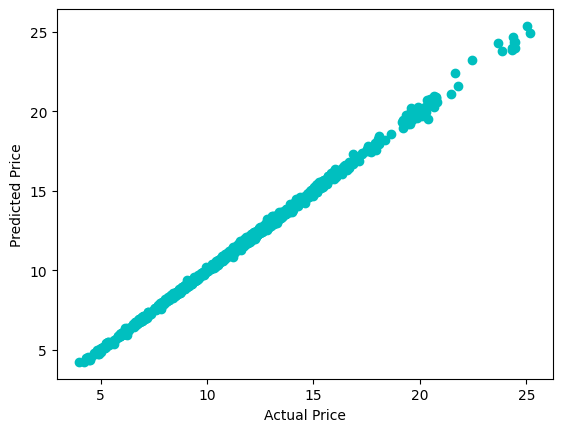

In [62]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='c')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

Text(0, 0.5, 'Stock Price')

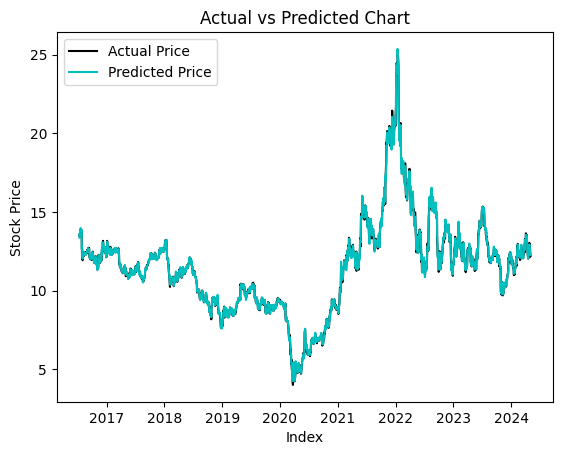

In [63]:
plt.plot(dfr.Actual_Price, color='black', label="Actual Price")
plt.plot(dfr.Predicted_Price, color='c', label="Predicted Price")
plt.title("Actual vs Predicted Chart")
plt.legend();
plt.xlabel("Index")
plt.ylabel("Stock Price")

In [64]:
!pip show yahoo_fin

Name: yahoo-fin
Version: 0.8.9.1
Summary: Download historical stock prices (daily / weekly / monthly),
                     realtime-prices, fundamentals data, income statements,
                     cash flows, analyst info, current cryptocurrency prices,
                     option chains, earnings history, and more with yahoo_fin.                    
Home-page: http://theautomatic.net/yahoo_fin-documentation/
Author: Andrew Treadway
Author-email: opensourcecoder11@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: feedparser, pandas, requests, requests-html
Required-by: 


In [65]:
import numpy as np
import pandas as pd
import yahoo_fin as yf
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from yahoo_fin import stock_info

# Fetch historical stock price data for Ford Motor Company
start_date = datetime.now() - timedelta(days=365*10)  # 10 years ago from today
end_date = datetime.now()
ford_data = stock_info.get_data("F", start_date=start_date, end_date=end_date)

# Extract features and target variable
X = np.array(ford_data.index).reshape(-1, 1)  # Using dates as features
y = ford_data['close'].values

# Split data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.15, random_state=0)

# Train a Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(train_x, train_y)

# Predict the closing price on October 30, 2024
prediction_date = np.array([datetime(2024, 10, 30).toordinal()]).reshape(-1, 1)
prediction = linear_reg_model.predict(prediction_date)

print("Predicted closing price of Ford Motor Company stock on October 30, 2024:", prediction[0])

Predicted closing price of Ford Motor Company stock on October 30, 2024: 21.556801290050462


Predicted closing price of Ford Motor Company stock on October 30, 2024: 21.556801290050462


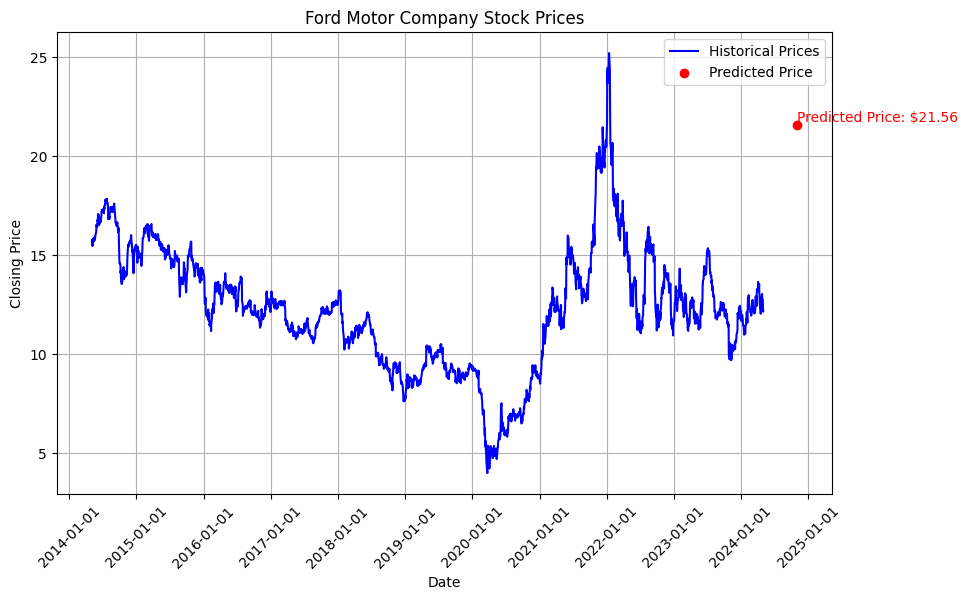

In [66]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from yahoo_fin import stock_info
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Fetch historical stock price data for Ford Motor Company
start_date = datetime.now() - timedelta(days=365*10)  # 10 years ago from today
end_date = datetime.now()
ford_data = stock_info.get_data("F", start_date=start_date, end_date=end_date)

# Extract features and target variable
X = np.array(ford_data.index).reshape(-1, 1)  # Using dates as features
y = ford_data['close'].values

# Split data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.15, random_state=0)

# Train a Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(train_x, train_y)

# Predict the closing price on October 30, 2024
prediction_date = np.array([datetime(2024, 10, 30).toordinal()]).reshape(-1, 1)
prediction = linear_reg_model.predict(prediction_date)

print("Predicted closing price of Ford Motor Company stock on October 30, 2024:", prediction[0])

# Plotting historical stock prices and predicted price
plt.figure(figsize=(10, 6))
plt.plot(ford_data.index, ford_data['close'], label='Historical Prices', color='blue')
plt.scatter(datetime(2024, 10, 30), prediction, color='red', label='Predicted Price')
plt.text(datetime(2024, 10, 30), prediction, f'Predicted Price: ${prediction[0]:.2f}',
         horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='red')
plt.title('Ford Motor Company Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()
